In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Description of dataset
1-age: Represents the age of the individual.

2-job: Describes the occupation or job of the person.

3-marital: Indicates the marital status of the person (e.g., married, single, divorced).

4-education: Represents the educational level of the person (e.g., primary, secondary, tertiary).

5-default: Indicates whether the person has credit in default ('yes', 'no', or 'unknown').

6-housing: Shows whether the person has a housing loan ('yes', 'no', or 'unknown').

7-loan: Indicates whether the person has a personal loan ('yes', 'no', or 'unknown').

8-contact: Describes the method of communication used to contact the person (e.g., 'cellular', 'telephone').

9-day: Indicates the day of the week of the last contact.

10-month: Represents the month of the last contact.

11-Duration: Represents the duration of the last contact in seconds

12-campaign: Indicates the number of contacts made during this campaign.

13-pdays: Describes the number of days since the person was last contacted or -1 if they were not previously contacted.

14-previous: Represents the number of contacts made before this campaign.

15-poutcome: Indicates the outcome of the previous marketing campaign.

16-deposit: The target variable, indicating whether the person subscribed to a term deposit ('yes' or 'no')gn.

In [2]:
df=pd.read_csv('bank.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [5]:
df=df[df['job']!='unknown']

In [6]:
df.job = df.job.str.replace(".", "")

/tmp/ipykernel_46539/1838352396.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.job = df.job.str.replace(".", "")


In [7]:
age_job=pd.pivot_table(df, values='age', index='job', aggfunc='mean')
print(age_job)

                     age
job                     
admin          39.374063
blue-collar    39.505144
entrepreneur   42.887195
housemaid      47.445255
management     40.218239
retired        65.424165
self-employed  39.809877
services       38.141928
student        26.102778
technician     39.001646
unemployed     40.997199


<Figure size 1200x800 with 0 Axes>

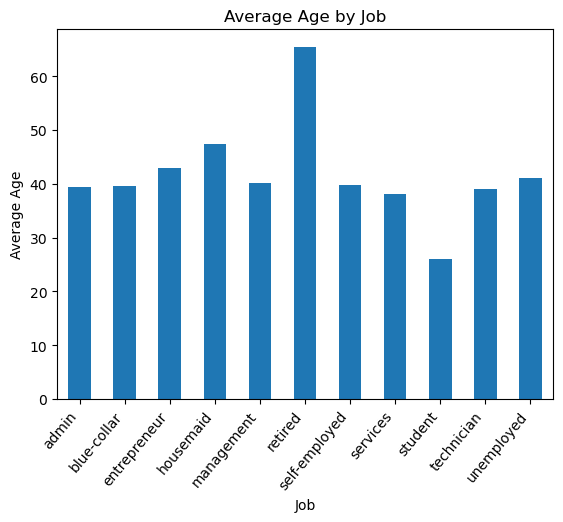

In [8]:
plt.figure(figsize=(12,8))
age_job.plot(kind='bar', legend=False)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show()


In [9]:
pd.crosstab(df.job,columns=df.education,values=df.age,aggfunc='mean').round(0)

education,primary,secondary,tertiary,unknown
job,,,,
admin,48.0,40.0,35.0,46.0
blue-collar,42.0,38.0,36.0,43.0
entrepreneur,46.0,43.0,42.0,46.0
housemaid,50.0,45.0,42.0,54.0
management,48.0,42.0,39.0,48.0
retired,67.0,64.0,64.0,70.0
self-employed,45.0,40.0,38.0,51.0
services,44.0,37.0,37.0,43.0
student,23.0,25.0,28.0,27.0


In [10]:
df.education.value_counts()

secondary    5461
tertiary     3680
primary      1493
unknown       458
Name: education, dtype: int64

In [ ]:
df=df[df['education']!='unknown']

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x=df.age, hue=df.education, bins=10,kde=True)

plt.title('Histogram of Age with Education ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
pip install xgboost

# APPLYING XGBOOST FOR DEPOSIT PREDICTION

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
le=LabelEncoder()

In [14]:
non_numeric_cols=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        pass
    else:
        non_numeric_cols.append(col)

In [15]:
for col in non_numeric_cols:
    df[col]=le.fit_transform(df[col])
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3,1
6,56,4,1,2,0,830,1,1,2,6,8,1201,1,-1,0,3,1
7,60,5,0,1,0,545,1,0,2,6,8,1030,1,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,8,1297,3,-1,0,3,1


In [16]:
x=df.iloc[:,0:16]
y=df['deposit']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)